In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# !pip install tensorflow-gpu 
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import cv2
import imghdr
import os

In [ ]:
data_dir = '/content/drive/MyDrive/Data'

In [ ]:
exts = ['jpeg', 'png', 'gif', 'bmp']

In [ ]:
for img_class in os.listdir(data_dir):
  for img in os.listdir(os.path.join(data_dir, img_class)):
    img_path = os.path.join(data_dir, img_class, img)
    try:
      img = cv2.imread(img_path)
      tip = imghdr.what(img_path)
      if tip not in exts:
        os.remove(img_path)
    except Exception as e:
      print('Issue with image {}'.format(img_path))

In [ ]:
#@title load data
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data')

Found 2112 files belonging to 2 classes.


In [ ]:
iterator = data.as_numpy_iterator()

In [ ]:
batch = iterator.next()

In [ ]:
batch

In [ ]:
len(batch)

2

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
len(batch[1])

32

In [ ]:
# batch[0] :32 imgs
# batch[1] : 32 labels

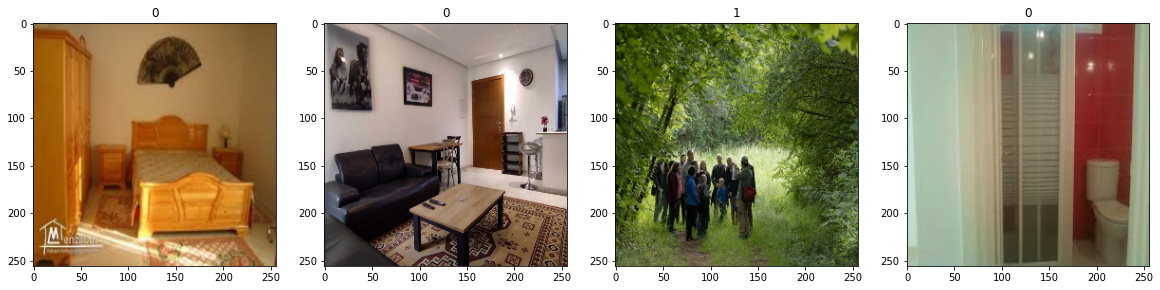

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# class 0 : validate img
# class 1 : non valdate img

In [ ]:
#@title Preprocessing

In [ ]:
# scaling :
data = data.map(lambda x,y: (x/255, y))

In [ ]:
batch = data.as_numpy_iterator().next()

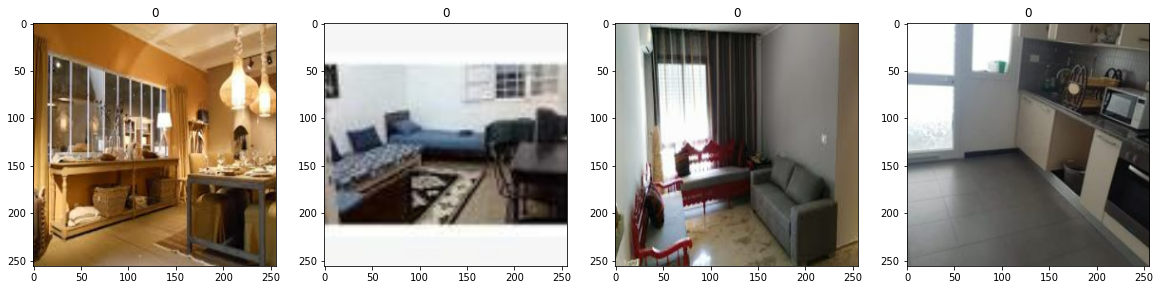

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0].max()

1.0

In [ ]:
# split data
len(data)

66

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
print(train_size, val_size, test_size)

46 13 6


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
#@title Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [ ]:
!mkdir logs

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
46/46 [==============================] - 92s 2s/step - loss: 1.2812 - accuracy: 0.8451 - val_loss: 0.3267 - val_accuracy: 0.9062
Epoch 2/10
46/46 [==============================] - 81s 2s/step - loss: 0.3118 - accuracy: 0.9151 - val_loss: 0.2699 - val_accuracy: 0.9183
Epoch 3/10
46/46 [==============================] - 88s 2s/step - loss: 0.1871 - accuracy: 0.9457 - val_loss: 0.2449 - val_accuracy: 0.9231
Epoch 4/10
46/46 [==============================] - 91s 2s/step - loss: 0.1122 - accuracy: 0.9620 - val_loss: 0.2585 - val_accuracy: 0.9159
Epoch 5/10
46/46 [==============================] - 81s 2s/step - loss: 0.0628 - accuracy: 0.9823 - val_loss: 0.1883 - val_accuracy: 0.9519
Epoch 6/10
46/46 [==============================] - 81s 2s/step - loss: 0.0446 - accuracy: 0.9871 - val_loss: 0.2021 - val_accuracy: 0.9447
Epoch 7/10
46/46 [==============================] - 89s 2s/step - loss: 0.0280 - accuracy: 0.9939 - val_loss: 0.2424 - val_accuracy: 0.9471
Epoch 8/10
46/46 [==

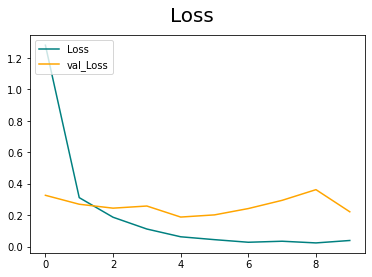

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='Loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_Loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

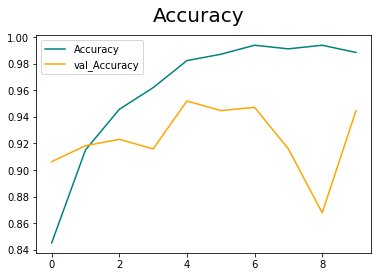

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_Accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
#@title Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 415ms/step


In [ ]:
print(f'Precision = {pre.result().numpy()}\nRecall = {re.result().numpy()}\nAccuracy = {acc.result().numpy()}')

Precision = 0.807692289352417
Recall = 0.6363636255264282
Accuracy = 0.9114583134651184


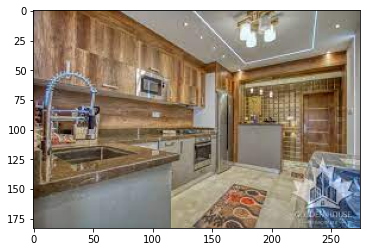

In [ ]:
#@title Test
img = cv2.imread('/content/download.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

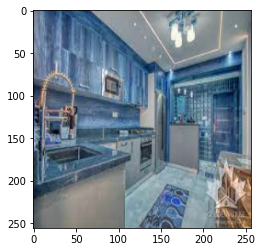

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 148ms/step


In [ ]:
yhat

array([[6.506824e-05]], dtype=float32)

In [ ]:
#@title Save 
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'HouseClassifierModel.h5'))